In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from KMeans import KMeans
from PCA import PCA

In [2]:
x = pd.read_csv("../data_processed.csv").to_numpy()

In [3]:
pca = PCA(x)

In [4]:
def test_for_n_value(n: int, pca: PCA, k: int = 5):
    z = pca.fit_transform(n)
    kmeans = KMeans(z)
    return kmeans.fit(k, True, plot_metrics = True)

inertia = 1000.7083586386715
Silhouette score = 0.3579007242527868
Gap score = 0.7402220845124665


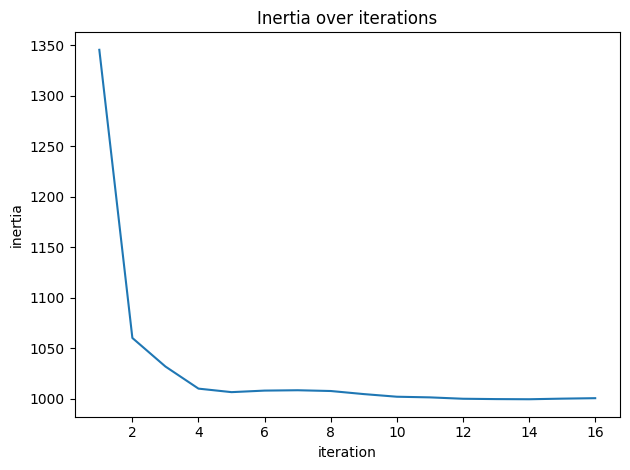

In [5]:
clusters2, centroids2, results2 = test_for_n_value(2, pca)

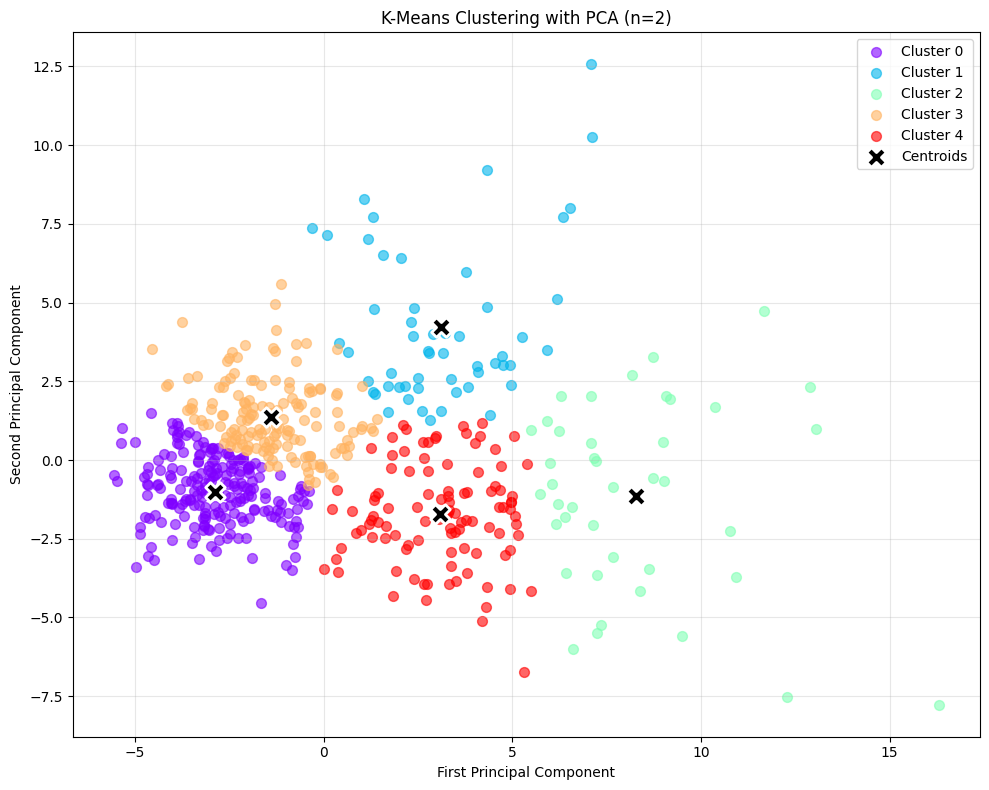

In [6]:
def plot_clusters_2d(clusters: np.ndarray, centroids: np.ndarray, z: np.ndarray, title: str = "K-Means Clustering (n=2)"):
    plt.figure(figsize=(10, 8))
    unique_clusters = np.unique(clusters)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))

    for i, cluster in enumerate(unique_clusters):
        cluster_points = z[clusters == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   c=[colors[i]], label=f'Cluster {cluster}',
                   alpha=0.6, s=50)

    plt.scatter(centroids[:, 0], centroids[:, 1],
               c='black', marker='X', s=200,
               edgecolors='white', linewidths=2,
               label='Centroids')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

z2 = pca.fit_transform(2)
plot_clusters_2d(clusters2, centroids2, z2, "K-Means Clustering with PCA (n=2)")

inertia = 1652.73703988989
Silhouette score = 0.19566564668314987
Gap score = 0.898625276725646


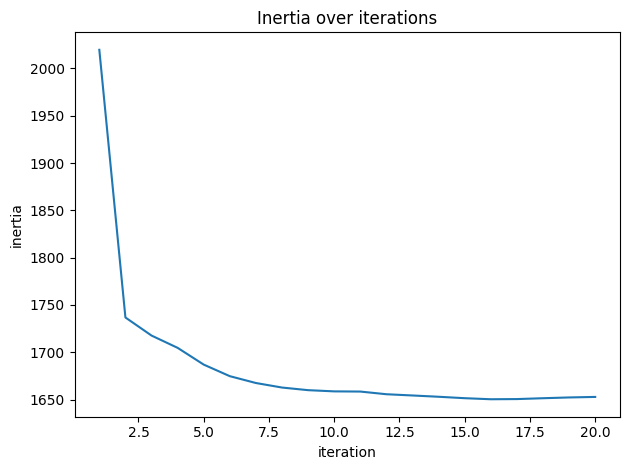

In [7]:
clusters5, centroids5, results5 = test_for_n_value(5, pca)

inertia = 1892.0752332157786
Silhouette score = 0.16319303685878142
Gap score = 0.9804953421963081


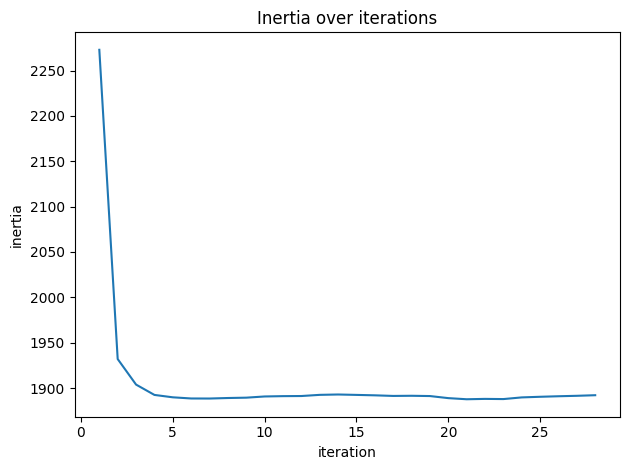

In [8]:
clusters10, centroids10, results10 = test_for_n_value(10, pca)

inertia = 1967.626468919158
Silhouette score = 0.15270471689489723
Gap score = 1.0024558371717012


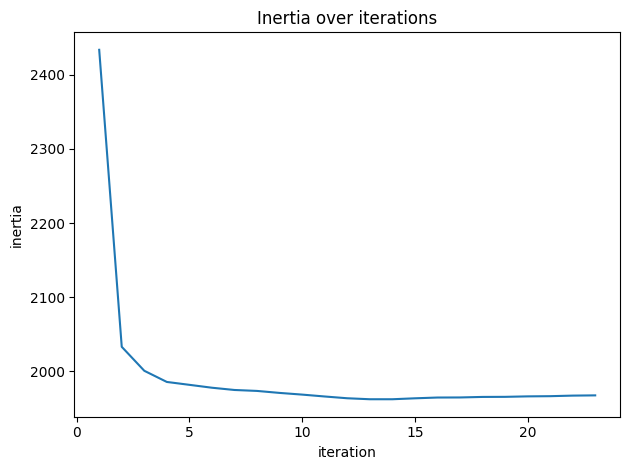

In [9]:
clusters15, centroids15, results15 = test_for_n_value(15, pca)

inertia = 1993.687545682064
Silhouette score = 0.141750734227223
Gap score = 1.0074653268086173


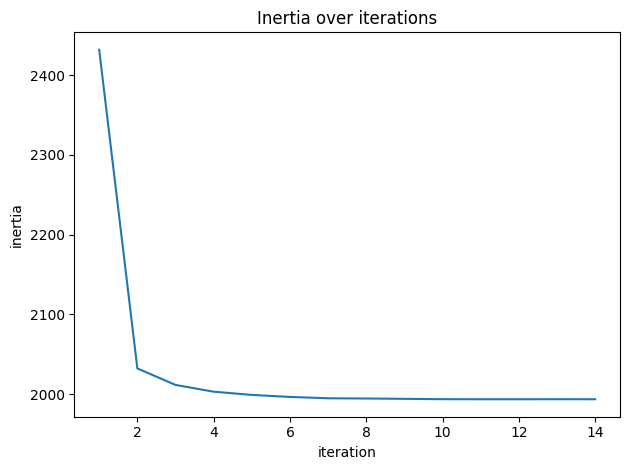

In [10]:
clusters20, centroids20, results20 = test_for_n_value(20, pca)

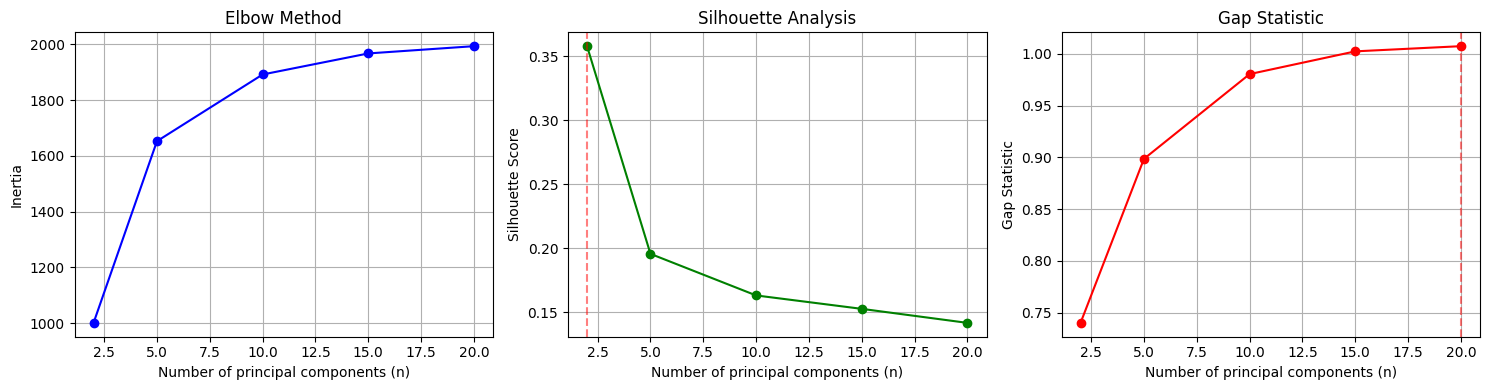

Best n by Silhouette Score: 2 (score: 0.3579)
Best n by Gap Statistic: 20 (gap: 1.0075)
Check the Elbow plot for visual inflection point


In [11]:
n = [2, 5, 10, 15, 20]
inertias = [results2['inertia'], results5['inertia'], results10['inertia'], results15['inertia'], results20['inertia']]
silhouette_scores = [results2['silhouette score'], results5['silhouette score'], results10['silhouette score'], results15['silhouette score'], results20['silhouette score']]
gap_scores = [results2['gap score'], results5['gap score'], results10['gap score'], results15['gap score'], results20['gap score']]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(n, inertias, 'bo-')
axes[0].set_xlabel('Number of principal components (n)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

axes[1].plot(n, silhouette_scores, 'go-')
axes[1].set_xlabel('Number of principal components (n)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis')
best_sil_k = list(n)[np.argmax(silhouette_scores)]
axes[1].axvline(x=best_sil_k, color='r', linestyle='--', alpha=0.5)
axes[1].grid(True)

axes[2].plot(n, gap_scores, 'ro-')
axes[2].set_xlabel('Number of principal components (n)')
axes[2].set_ylabel('Gap Statistic')
axes[2].set_title('Gap Statistic')
best_gap_k = list(n)[np.argmax(gap_scores)]
axes[2].axvline(x=best_gap_k, color='r', linestyle='--', alpha=0.5)
axes[2].grid(True)
plt.tight_layout()
plt.show()

best_n_silhouette = list(n)[np.argmax(silhouette_scores)]
best_n_gap = list(n)[np.argmax(gap_scores)]

print(f"Best n by Silhouette Score: {best_n_silhouette} (score: {max(silhouette_scores):.4f})")
print(f"Best n by Gap Statistic: {best_n_gap} (gap: {max(gap_scores):.4f})")
print("Check the Elbow plot for visual inflection point")
